# 1 :  Frame the problem
We have a dataset from the Kaggle competition *Titanic - Machine Learning from disaster"*, that contains information about the passangers omboard the unsinkable Titanic and which of the passangers surrvived her sinking. Our Machine Learning model will be used to predict if a passanger surrvived the sinking or not. These predictions will be used in relation to the new research that claims that your sosial status played a role in your chances of surrvival. Based on these claims a videogame company, TitanicGames, wants us to make a model that can predict the surrvival of a player that is playing the game. If they surrvive they win, and otherwise they lose. Sience the dataset is labeled, we will use a supervied learning algorithm. We will also use a classification model, it just feels like the natural choise; did the passanger surrvive or not.

# 2 : Get the data
## Import

In [1502]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [1503]:
%matplotlib inline
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt, os
from scipy import stats
from pathlib import Path

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

import pickle

In [1504]:
DATA = Path('/kaggle/input/titanic/')
list(DATA.iterdir())

[PosixPath('/kaggle/input/titanic/train.csv'),
 PosixPath('/kaggle/input/titanic/test.csv'),
 PosixPath('/kaggle/input/titanic/gender_submission.csv')]

In [1505]:
#Loading the different CSV-files given in the competition as Pandas-dataframes
train = pd.read_csv(DATA/'train.csv')
test = pd.read_csv(DATA/'test.csv')
submission = pd.read_csv(DATA/'gender_submission.csv')

# 3 : Explore the data
## Exploring and gaining insight on the train-dataframe

In [1506]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We notice that there are a lot of missing values in the **Age**-feature, some in **Embarked**-feature and a bunch in the **Cabin**-feature. The one with **Cabin** makes kind of sense, sience back in the days there were only first class that had cabin included in their ticket. 

In [1507]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1508]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Exploring and gaining insight on the test-dataframe

In [1509]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1510]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Here we can see that there are missing values in both **Age** and **Cabin**, but there are no missing values in **Embarked** like in the training set

In [1511]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [1512]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

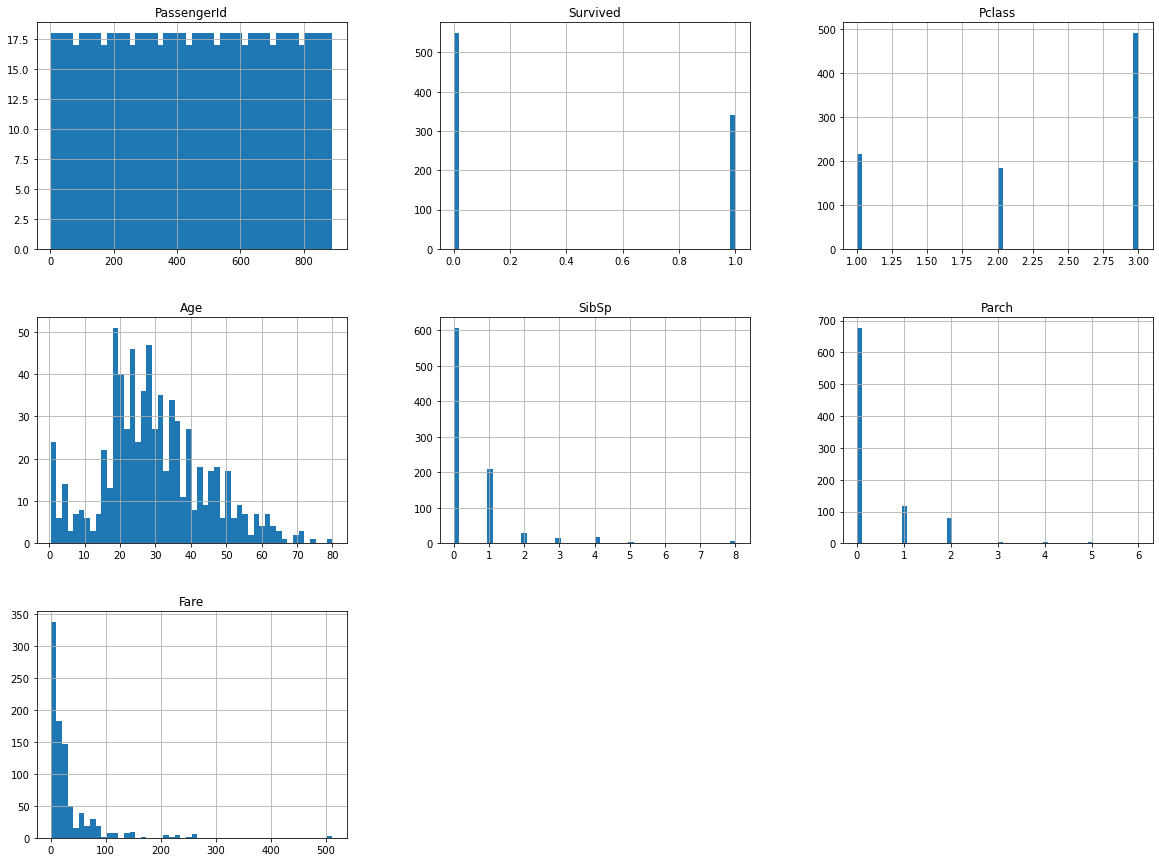

In [1513]:
train.hist(bins=50, figsize=(20,15))
plt.show()

**Doing some feature engineering so we have more data in numbers for the visualistaion of the data. Will also be cleaning the data and dealing with missing data** 
    *Please note that the columns that are written with all lower cap, are most likely to droped at a later stage*

In [1514]:
#Get one column that only contain the title of a passanger
train[['etternavn', 'titel']] = train['Name'].str.split(',', expand=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,etternavn,titel
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


In [1515]:
#doing the same again to have the Title alone, will drop "etternavn" and "reisevenn" and reasoning will be given when they are dropped.
train[['Title', 'etternavn', 'reisevenn']] = train['titel'].str.split('.', expand=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,etternavn,titel,Title,reisevenn
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Owen Harris,Mr. Owen Harris,Mr,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,John Bradley (Florence Briggs Thayer),Mrs. John Bradley (Florence Briggs Thayer),Mrs,None
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Laina,Miss. Laina,Miss,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Jacques Heath (Lily May Peel),Mrs. Jacques Heath (Lily May Peel),Mrs,None
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,William Henry,Mr. William Henry,Mr,None


In [1516]:
train.replace(['male', 'female'], [0,1], inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,etternavn,titel,Title,reisevenn
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Owen Harris,Mr. Owen Harris,Mr,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,John Bradley (Florence Briggs Thayer),Mrs. John Bradley (Florence Briggs Thayer),Mrs,None
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Laina,Miss. Laina,Miss,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Jacques Heath (Lily May Peel),Mrs. Jacques Heath (Lily May Peel),Mrs,None
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,William Henry,Mr. William Henry,Mr,None


**Dropping columns to make the tabular data look more compact**

In [1517]:
#We don´t care about about the name about the passanger, sience we can´t make them to "usable" numerical data
train = train.drop(columns='Name') 

#Dropping with the same reasoning as 'Name'
train = train.drop(columns='etternavn')

#There were some "strangeness" in the column 'Name', so when we did the split of the column some passangers had there name included in their title.
train = train.drop(columns='reisevenn')

#Sience the cabins were for first class passangers only and there is more than half of the data missing, we choose to drop this column
train = train.drop(columns='Cabin')

#This column is unique for every passanger and does not give us a lot of info about the passangers
train = train.drop(columns='Ticket')

#titel is beeing droped becuase it contains name, and does not make sense to us to convert it to numerical data
train = train.drop(columns='titel')

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,S,Mr
1,2,1,1,1,38.0,1,0,71.2833,C,Mrs
2,3,1,3,1,26.0,0,0,7.9250,S,Miss
3,4,1,1,1,35.0,1,0,53.1000,S,Mrs
4,5,0,3,0,35.0,0,0,8.0500,S,Mr


## Visualisation of the different datas ##

<AxesSubplot:>

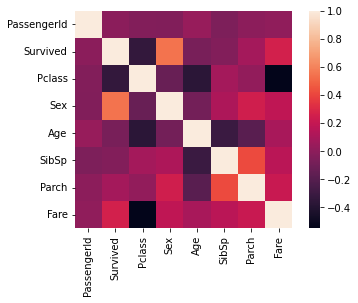

In [1518]:
sns.heatmap(train.corr(), square=True, cmap='rocket')

**Exploration of the target value (Survived)**

<AxesSubplot:>

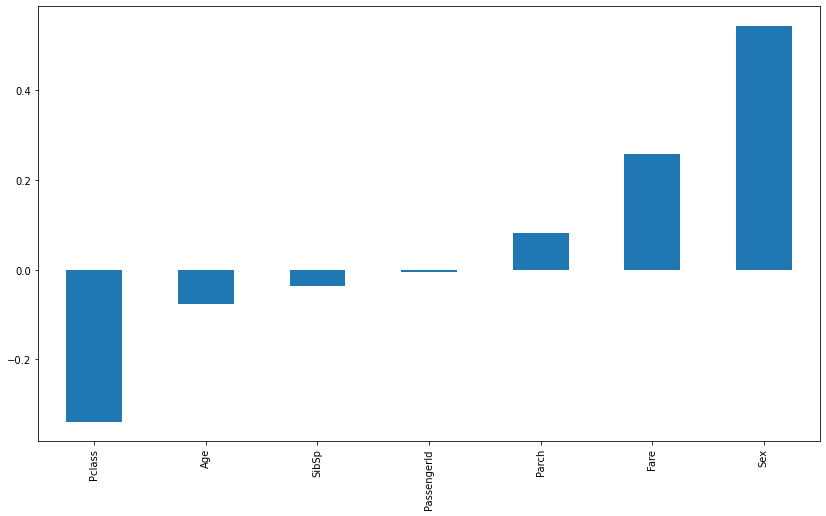

In [1519]:
plt.figure(figsize=(14,8))
train.corr()['Survived'].sort_values()[:-1].plot(kind='bar')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Survived', ylabel='Density'>

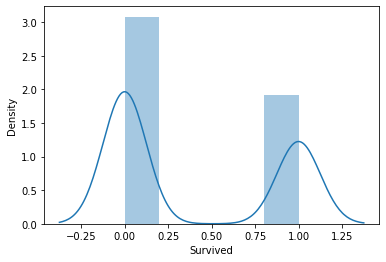

In [1520]:
sns.distplot(train['Survived'])

# 4 : Prepare the data

**Dealing with the missing data**

In [1521]:
median = train['Age'].median()
train['Age'].fillna(median, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
 9   Title        891 non-null    object 
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


In [1522]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [1523]:
train.Title.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [1524]:
train.replace([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme', ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt', ' the Countess', ' Jonkheer'], 
          [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,S,1
1,2,1,1,1,38.0,1,0,71.2833,C,2
2,3,1,3,1,26.0,0,0,7.9250,S,3
3,4,1,1,1,35.0,1,0,53.1000,S,2
4,5,0,3,0,35.0,0,0,8.0500,S,1


In [1525]:
train.replace(['S', 'C', 'Q'], [0,1,2], inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,0.0,1
1,2,1,1,1,38.0,1,0,71.2833,1.0,2
2,3,1,3,1,26.0,0,0,7.9250,0.0,3
3,4,1,1,1,35.0,1,0,53.1000,0.0,2
4,5,0,3,0,35.0,0,0,8.0500,0.0,1


In [1526]:
median = train['Embarked'].median()
train["Embarked"].fillna(median, inplace=True)
train['Embarked'].unique()

array([0., 1., 2.])

In [1527]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    float64
 9   Title        891 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 69.7 KB


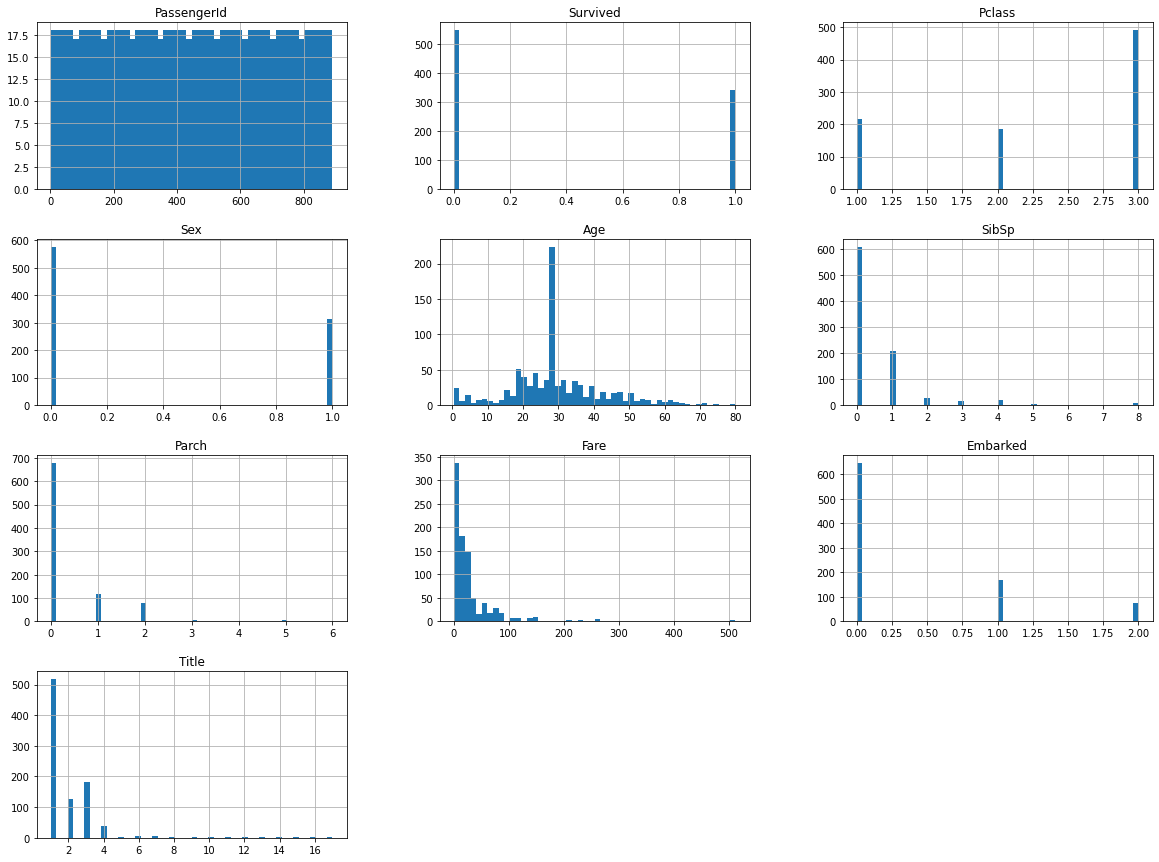

In [1528]:
train.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

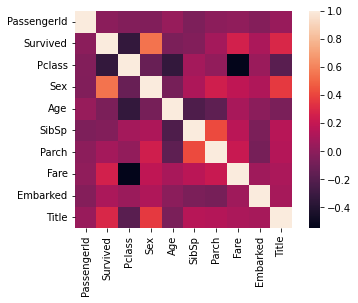

In [1529]:
sns.heatmap(train.corr(), square=True, cmap='rocket')

## Split into test and training set

In [1530]:
X = train.drop("Survived",axis=1)
y = train["Survived"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 5. Shortlist promising models

* ExtraTreesClassifier
* GradientBoostingClassifier
* MLPRegressor
* Ridge
* RandomForestClassifier
* SVR
* DecisionTreeClassifier

## Run models on test set

In [1531]:
from sklearn.ensemble import ExtraTreesClassifier

etg = ExtraTreesClassifier()

etg.fit(X_train, y_train)

y_predict = etg.predict(X_test)

mean_squared_error(y_test, y_predict)

0.15246636771300448

In [1532]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

y_predict = gbc.predict(X_test)

mean_squared_error(y_test, y_predict)

0.17937219730941703

In [1533]:
from sklearn.neural_network import MLPRegressor

mlpr = MLPRegressor(max_iter= 3000, n_iter_no_change = 200)

mlpr.fit(X_train, y_train)

y_predict = mlpr.predict(X_test)

mean_squared_error(y_test, y_predict)

0.9762255752592762

In [1534]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1, solver="cholesky")

ridge.fit(X_train, y_train)

y_predict = ridge.predict(X_test)

mean_squared_error(y_test, y_predict)

0.13717288403672906

In [1535]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100,min_samples_split= 2,min_samples_leaf= 1,max_features= 'sqrt',max_depth= 20,bootstrap= False)

rfc.fit(X_train, y_train)

y_predict = rfc.predict(X_test)

mean_squared_error(y_test, y_predict)

0.17937219730941703

In [1536]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(X_train, y_train)

y_predict = svr.predict(X_test)

mean_squared_error(y_test, y_predict)

0.25629768929594754

In [1537]:
from sklearn.tree import DecisionTreeClassifier

dtr = DecisionTreeClassifier(max_depth=10, random_state=0)

dtr.fit(X_train, y_train)

y_predict = dtr.predict(X_test)

mean_squared_error(y_test, y_predict)

0.20179372197309417

In [1538]:
from sklearn.ensemble import VotingClassifier

models = [('rf', rfc),
          ('etg',etg)]

ensemble = VotingClassifier(models)

ensemble.fit(X_train, y_train)

y_predict = ensemble.predict(X_test)

mean_squared_error(y_test, y_predict)

0.16143497757847533

# 6 : Fine tune

In [1539]:
model = ensemble

In [1540]:
model.score(X_train, y_train)

1.0

In [1541]:
model.score(X_test, y_test)

0.8385650224215246

# 7 : Present solution 

In [1542]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [1543]:
test[['etternavn', 'titel']] = test['Name'].str.split(',', expand=True)

test.replace(['male', 'female'], [0,1], inplace=True)

median = test['Age'].median()
test['Age'].fillna(median, inplace=True)

test.replace(['S', 'C', 'Q'], [0,1,2], inplace=True)

median = test['Embarked'].median()
test["Embarked"].fillna(median, inplace=True)

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,etternavn,titel
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,Kelly,Mr. James
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,Wilkes,Mrs. James (Ellen Needs)
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,Myles,Mr. Thomas Francis
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,Wirz,Mr. Albert
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,Hirvonen,Mrs. Alexander (Helga E Lindqvist)


In [1544]:
test[['Title', 'etternavn']] = test['titel'].str.split('.', expand=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
 11  etternavn    418 non-null    object 
 12  titel        418 non-null    object 
 13  Title        418 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 45.8+ KB


In [1545]:
test = test.drop(columns='Name') 
test = test.drop(columns='etternavn')
test = test.drop(columns='Cabin')
test = test.drop(columns='Ticket')
test = test.drop(columns='titel')

test.replace([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme', ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt', ' the Countess', ' Jonkheer', ' Dona'], 
          [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], inplace=True)

test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,2,1
1,893,3,1,47.0,1,0,7.0000,0,2
2,894,2,0,62.0,0,0,9.6875,2,1
3,895,3,0,27.0,0,0,8.6625,0,1
4,896,3,1,22.0,1,1,12.2875,0,2


In [1546]:
test['Fare'].fillna(0, inplace=True)
testid = test["PassengerId"].copy()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
 8   Title        418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


## Lage submission.csv

In [1547]:
predicted = model.predict(test)
output = pd.DataFrame({'PassengerId': testid,'Survived': predicted})
output.to_csv('submission.csv', index=False)

# 8 : Launch, Monitor & Maintain

In [1548]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))